# Test de l'opérateur ProblemDiscontinuT

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)

## Simulation en Euler

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

### Cas de la diffusion

In [3]:
n_lim = 10**8
t_fin_lim = 1.0

In [4]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="upwind", time_scheme="euler", phy_prop=phy_prop, cfl=0.5
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

dt fourier
6.918433404737903e-06
Ti
Cas : diffusion, euler, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


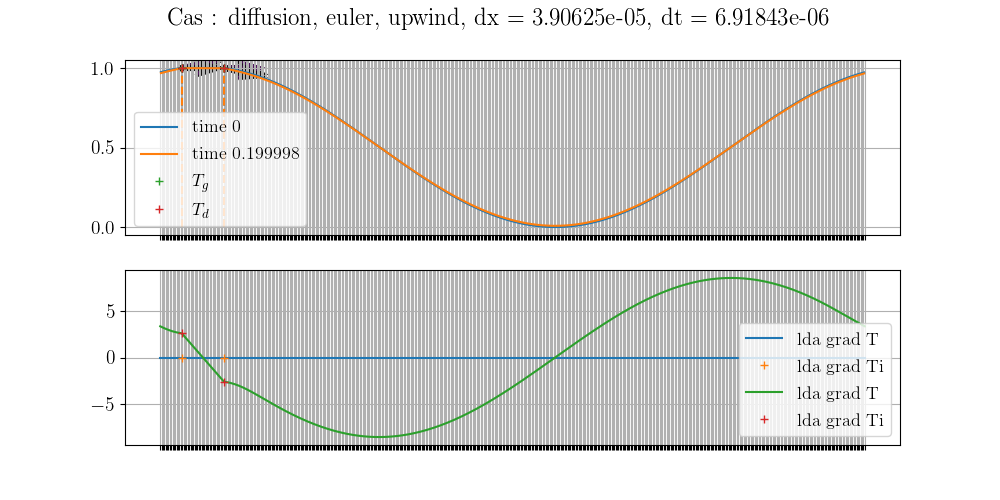

<IPython.core.display.Javascript object>


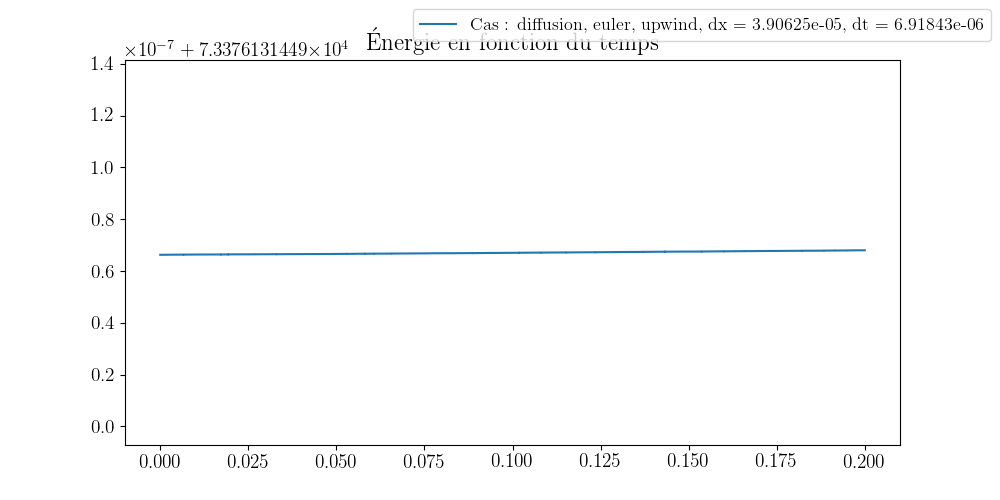

dE*/dt* = 8.66866e-19


In [5]:
t_fin = 0.2
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="Ti"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

dt fourier
6.918433404737903e-06
gradTi
Cas : diffusion, euler, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


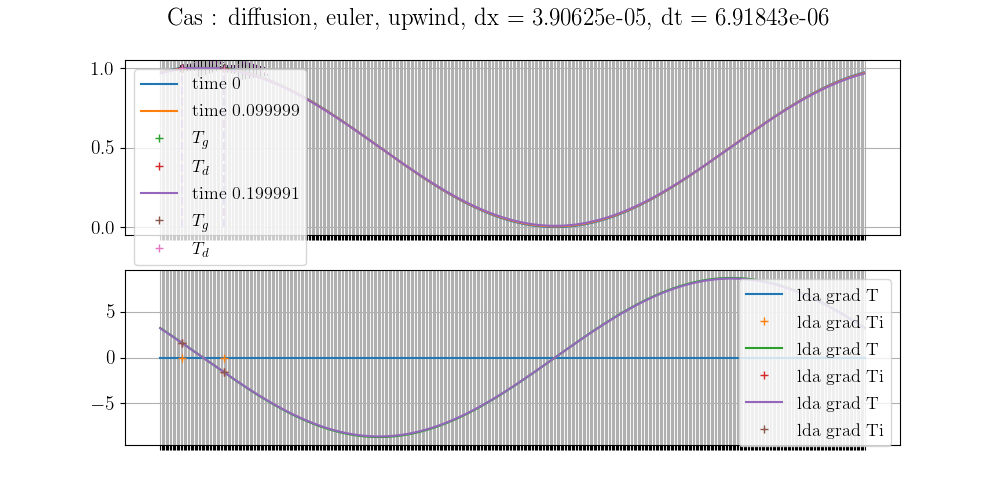

<IPython.core.display.Javascript object>


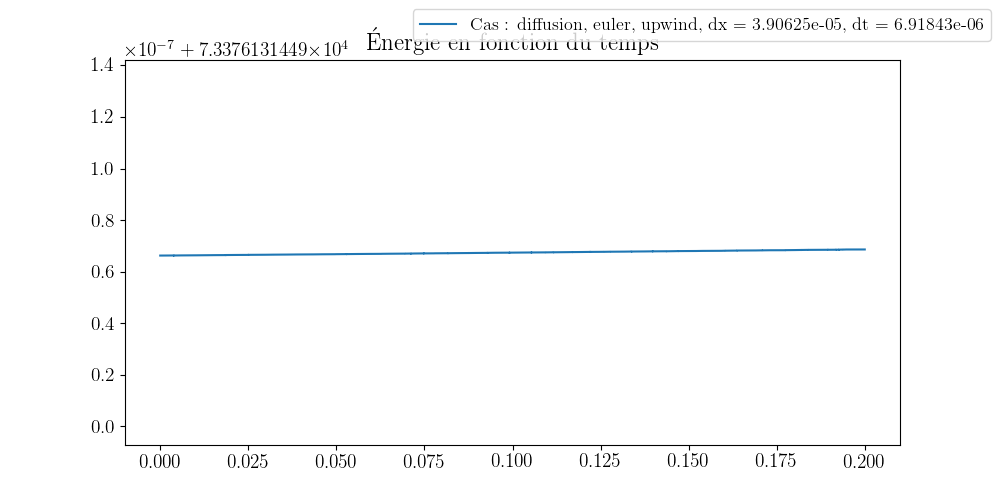

dE*/dt* = 1.13674e-18


In [6]:
t_fin = 0.2
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="gradTi"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    n=n_lim, t_fin=min(t_fin, t_fin_lim), number_of_plots=2, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

dt fourier
6.918433404737903e-06
gradTi2
Cas : diffusion, euler, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


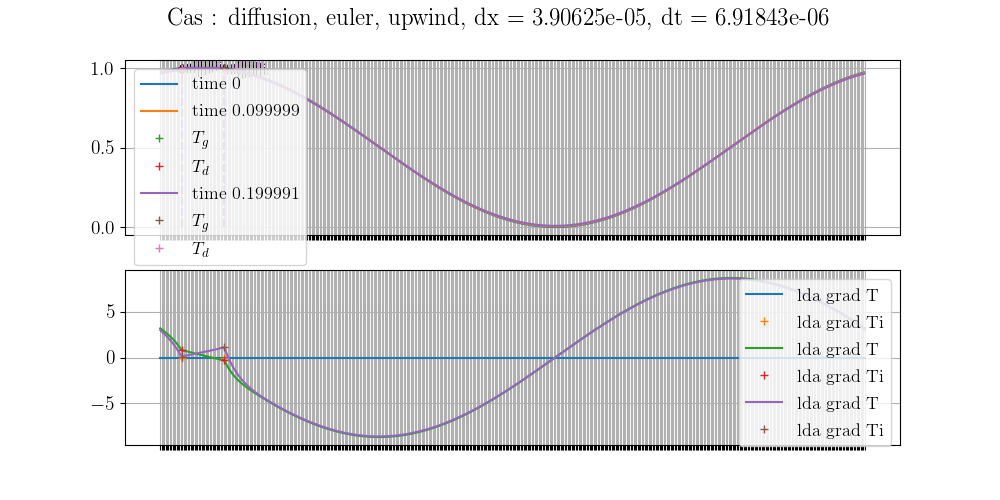

<IPython.core.display.Javascript object>


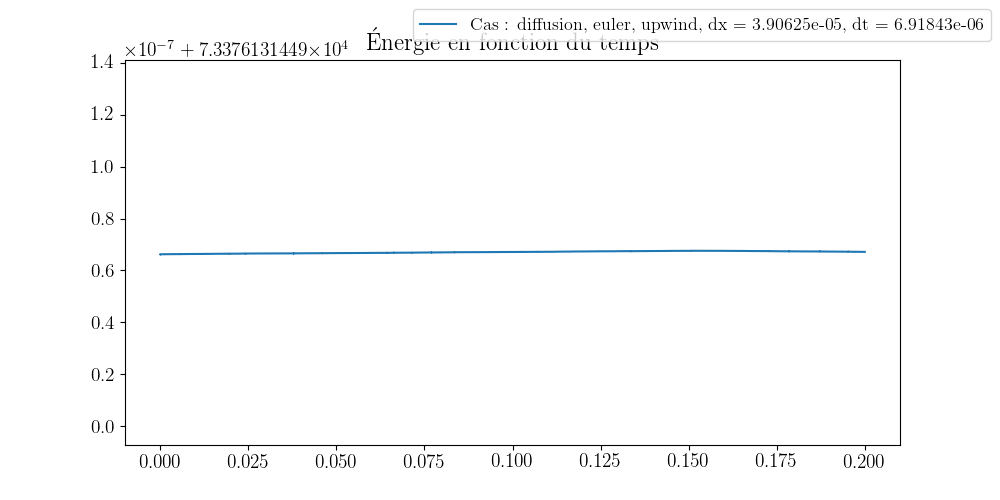

dE*/dt* = 3.18941e-19


In [7]:
t_fin = 0.2
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="gradTi2"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    n=n_lim, t_fin=min(t_fin, t_fin_lim), number_of_plots=2, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

### Test de la convection

Ici on met une vitesse de convection, et on supprime artificiellement la diffusion.

Pour augmenter la facilité du cas, on le réalise sur une température initiale continue.

In [8]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=1 * 10**-5, schema="upwind", time_scheme="euler", phy_prop=phy_prop, cfl=0.5
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt fourier
4.538601983461999e-07
Ti
Cas : convection, euler, upwind, dx = 1.0005e-05, cfl = 0.00907267


<IPython.core.display.Javascript object>


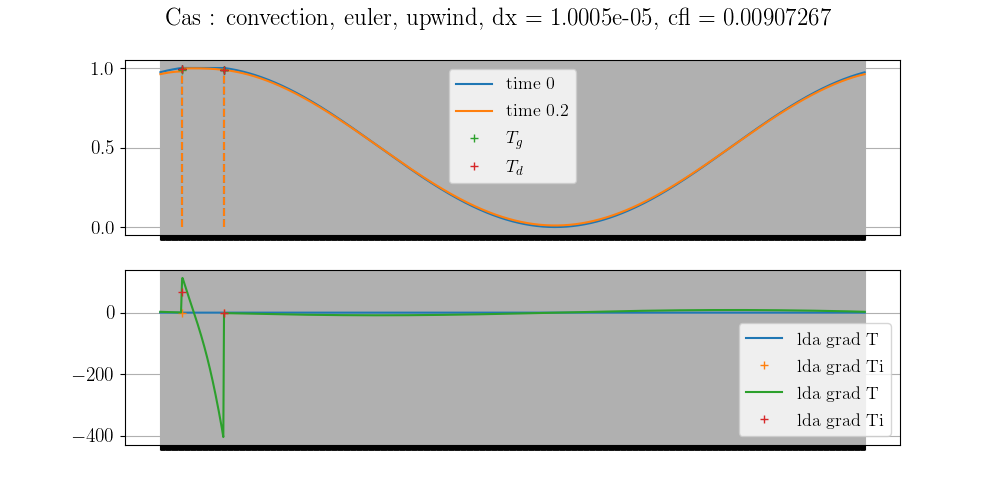

<IPython.core.display.Javascript object>


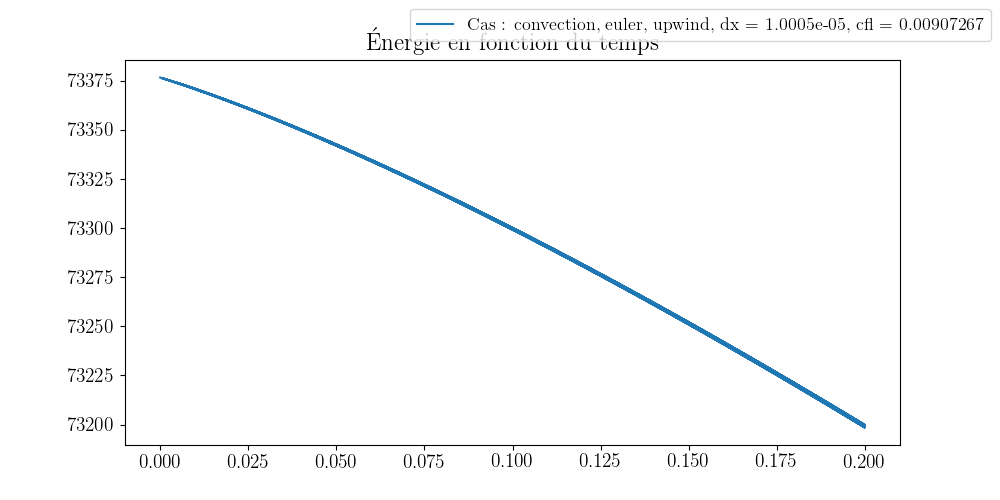

dE*/dt* = -5.79581e-09


In [9]:
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="Ti"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

### Test de la convection diffusion

In [10]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_ref = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=1 * 10**-5,
    schema="upwind",
    time_scheme="euler",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=1.0,
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt fourier
4.538601983461999e-07
Ti
Cas : mixte, euler, upwind, dx = 1.0005e-05, dt = 4.5386e-07, cfl = 0.00907267


<IPython.core.display.Javascript object>


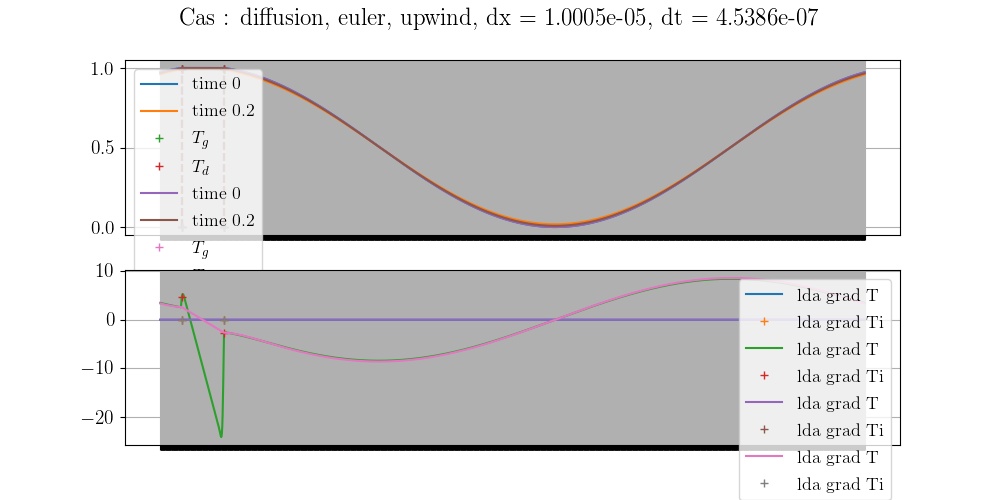

<IPython.core.display.Javascript object>


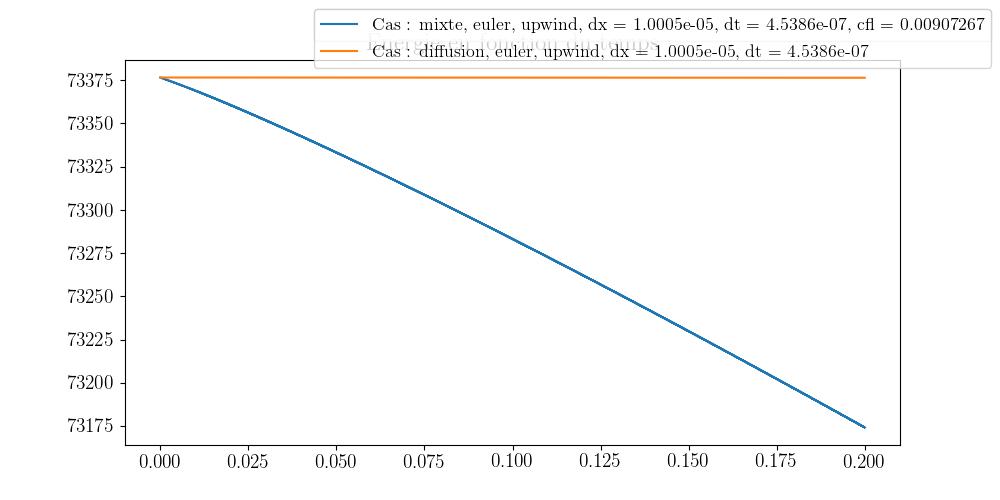

dE*/dt* = -6.51109e-09
dt fourier
4.538601983461999e-07
Cas : diffusion, euler, upwind, dx = 1.0005e-05, dt = 4.5386e-07
plotter mode changed to decale
dE*/dt* ref = -4.91982e-12


In [11]:
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="Ti"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

prob_ref = Problem(get_T, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print("==========================")
plot.cas = "decale"
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

dedt_adim = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* ref = %g" % dedt_adim)

## Simulation en RK4

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

### Cas de la diffusion

In [3]:
n_lim = 10**8
t_fin_lim = 10.0

In [4]:
# d = 6./100*Delta/2.
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="upwind", time_scheme="rk4", phy_prop=phy_prop, cfl=0.5
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)
# markers = Bulles(phy_prop=phy_prop)

dt fourier
6.918433404737903e-06
Ti
Cas : diffusion, rk4, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


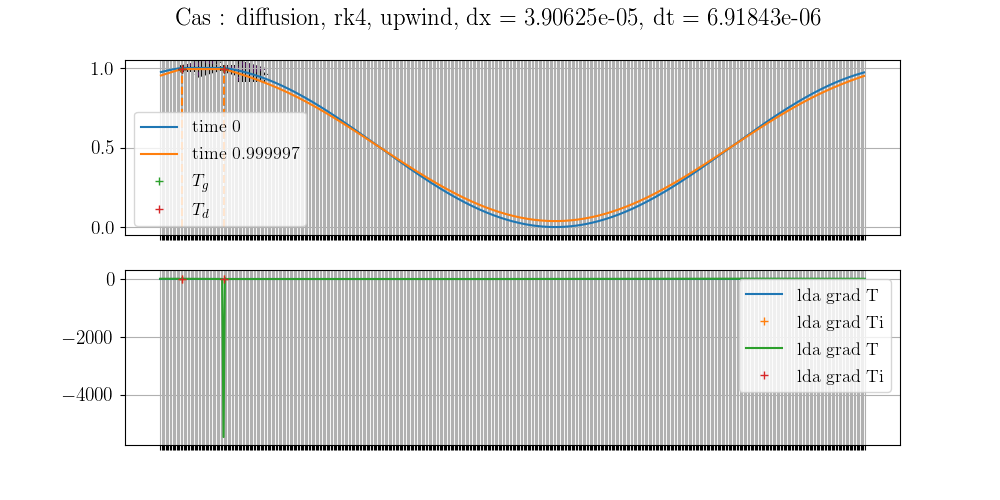

<IPython.core.display.Javascript object>


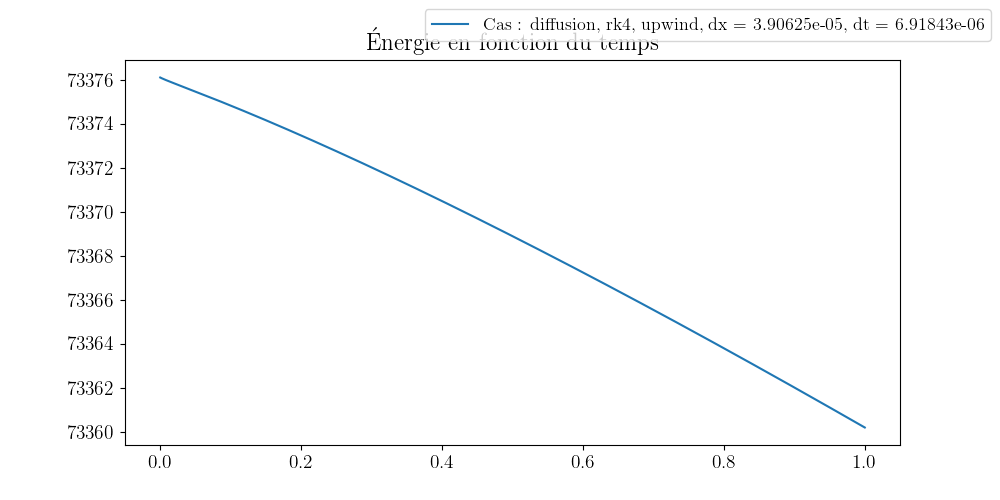

dE*/dt* = -1.56484e-09


In [5]:
t_fin = 1.0
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="Ti"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

dt fourier
6.918433404737903e-06
gradTi
Cas : diffusion, rk4, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


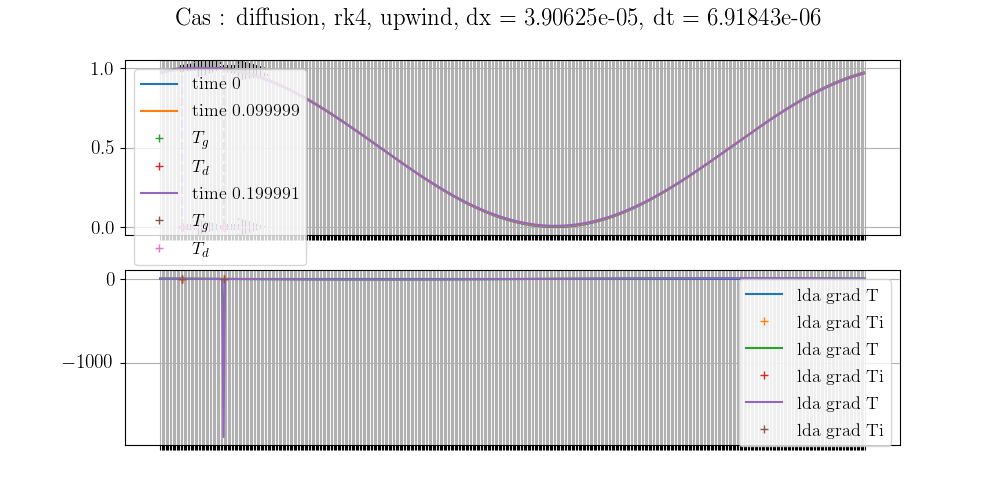

<IPython.core.display.Javascript object>


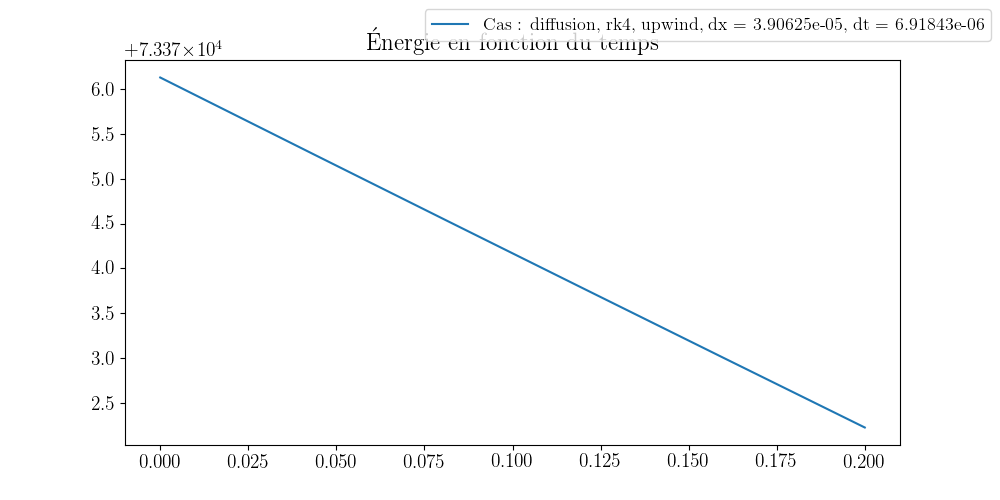

dE*/dt* = -1.83786e-09


In [15]:
t_fin = 0.2
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="gradTi"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    n=n_lim, t_fin=min(t_fin, t_fin_lim), number_of_plots=2, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

dt fourier
6.918433404737903e-06
gradTi2
Cas : diffusion, rk4, upwind, dx = 3.90625e-05, dt = 6.91843e-06


<IPython.core.display.Javascript object>


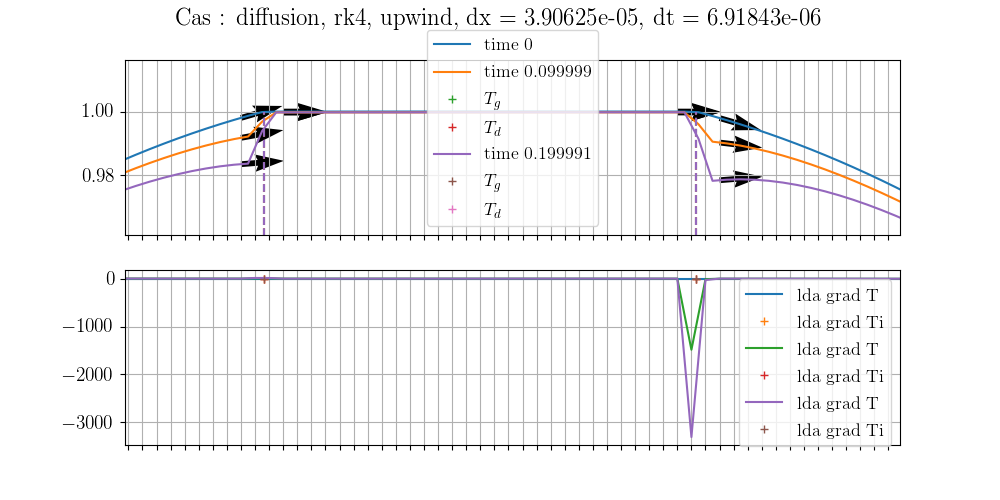

<IPython.core.display.Javascript object>


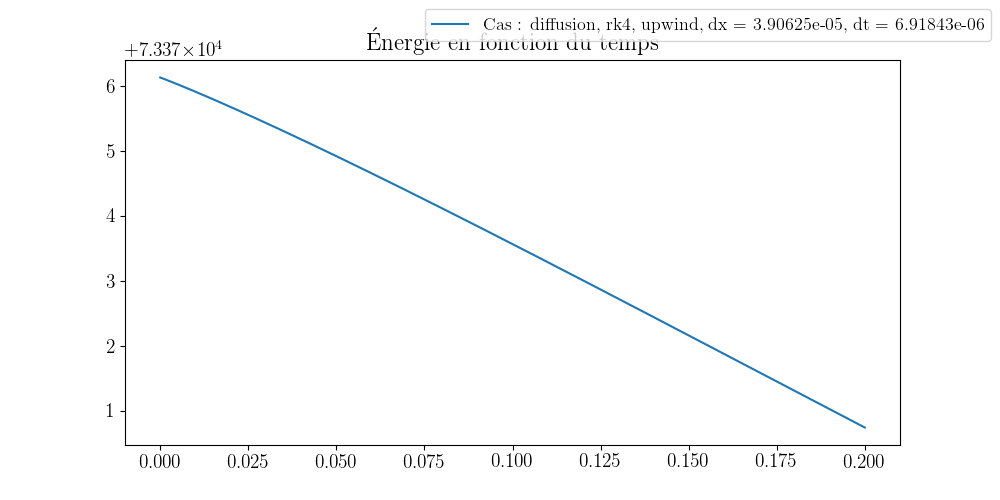

dE*/dt* = -2.60924e-09


In [16]:
t_fin = 0.2
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="gradTi2"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    n=n_lim, t_fin=min(t_fin, t_fin_lim), number_of_plots=2, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

### Test de la convection

Ici on met une vitesse de convection, et on supprime artificiellement la diffusion.

Pour augmenter la facilité du cas, on le réalise sur une température initiale continue.

In [3]:
n_lim = 10**8
t_fin_lim = 1.0

In [4]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.9 * 10**-5, schema="upwind", time_scheme="rk4", phy_prop=phy_prop, cfl=0.5
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt fourier
6.918433404737903e-06
Ti
Cas : convection, rk4, upwind, dx = 3.90625e-05, cfl = 0.0354224


<IPython.core.display.Javascript object>


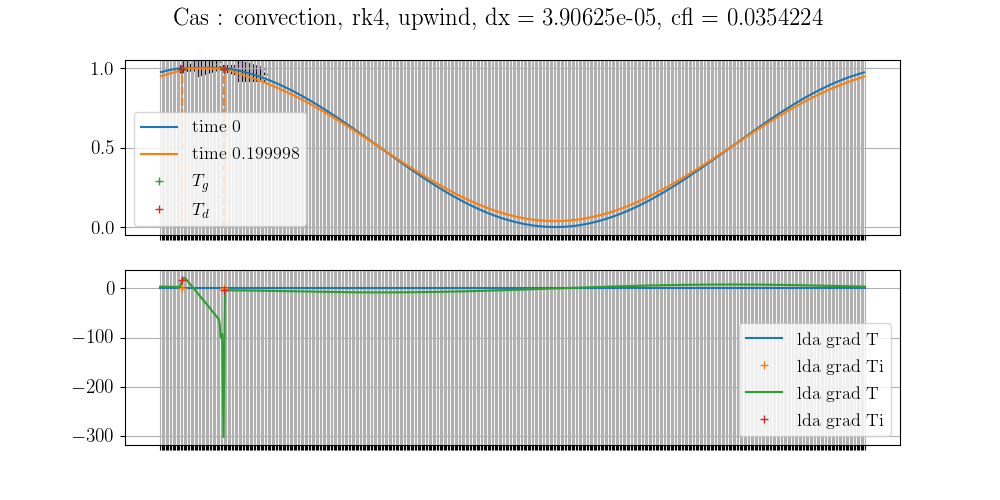

<IPython.core.display.Javascript object>


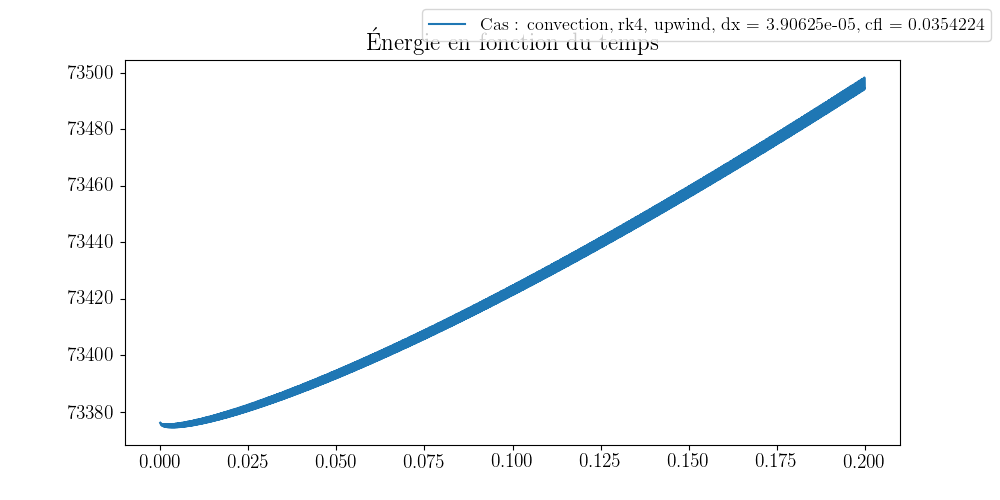

dE*/dt* = 6.32832e-08


In [5]:
t_fin = 0.2
prob = ProblemDiscontinuT(
    get_T, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type="Ti"
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("classic")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

### Test de la convection diffusion

In [6]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_ref = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=3.9 * 10**-5,
    schema="upwind",
    time_scheme="rk4",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=1.0,
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt fourier
6.918433404737903e-06
Ti
Cas : mixte, rk4, upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224


<IPython.core.display.Javascript object>


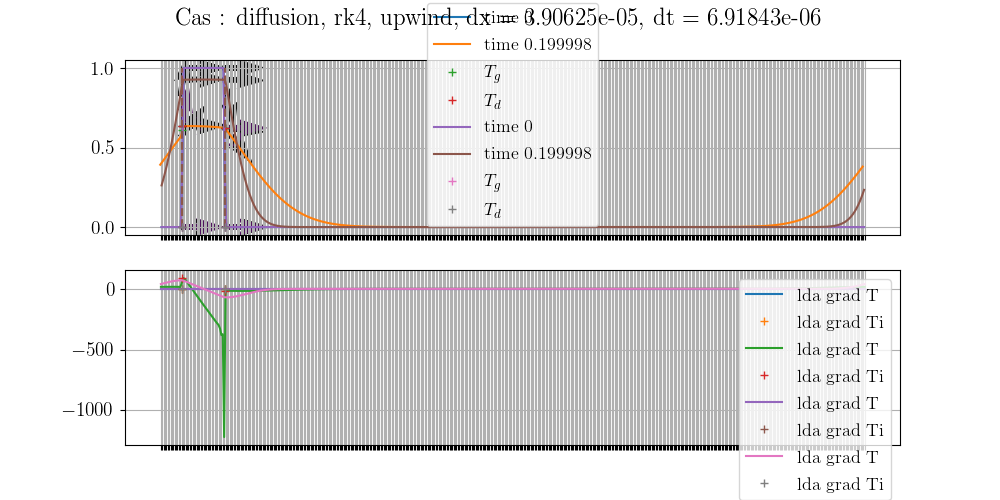

<IPython.core.display.Javascript object>


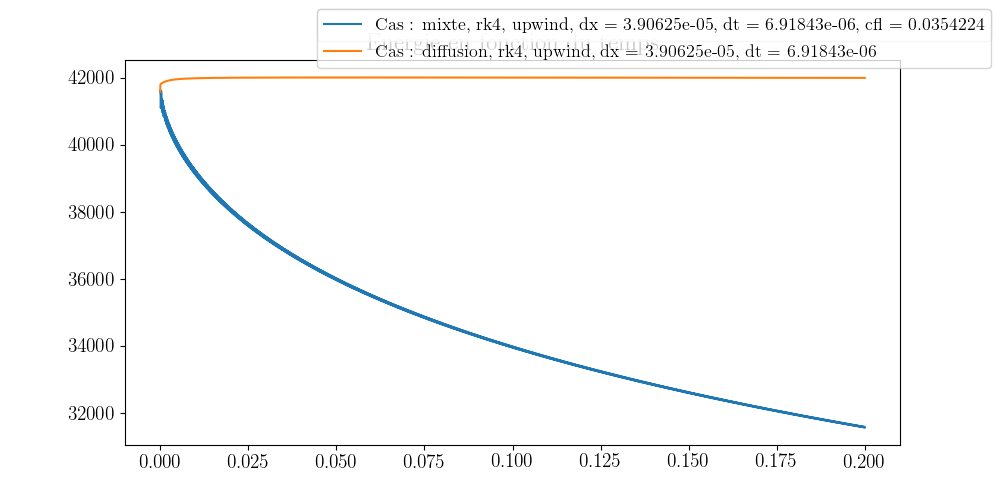

dE*/dt* = -5.16765e-06
dt fourier
6.918433404737903e-06
Cas : diffusion, rk4, upwind, dx = 3.90625e-05, dt = 6.91843e-06
plotter mode changed to classic
dE*/dt* ref = -1.14705e-08


In [8]:
prob = ProblemDiscontinuT(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti",
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("decale")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

prob_ref = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop
)
E1 = prob_ref.energy
print(prob_ref.name)
print("==========================")
plot.cas = "classic"
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

dedt_adim = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* ref = %g" % dedt_adim)

dt fourier
6.918433404737903e-06
gradTi2
Cas : mixte, rk4, upwind, dx = 3.90625e-05, dt = 6.91843e-06, cfl = 0.0354224


<IPython.core.display.Javascript object>


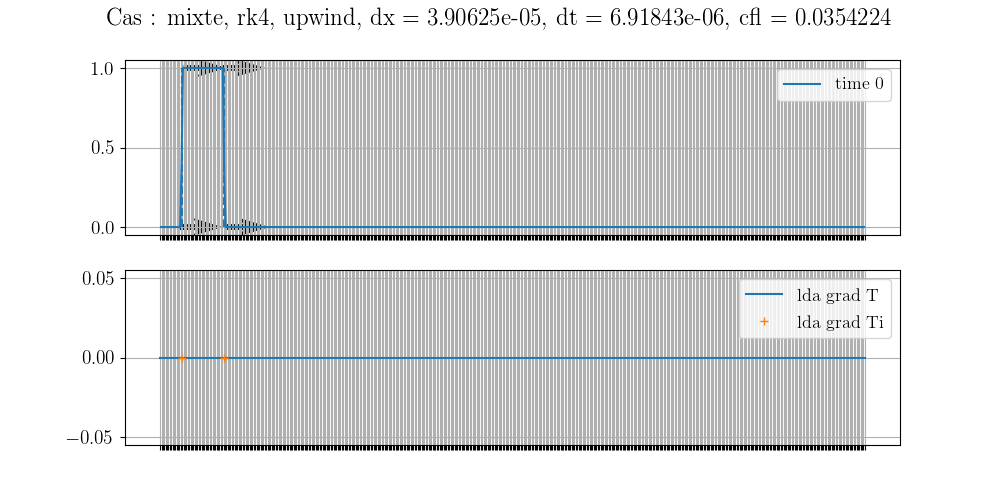

T :  [ 2.20912032e+295              inf              nan              nan
             -inf -7.70888476e+296 -1.62807016e+296]
Tg :  [2.20912032e+295             inf             nan             nan]
Td :  [             nan             -inf -7.70888476e+296 -1.62807016e+296]


/home/as259691/PycharmProjects/FluidDyn1D/src/main.py:10: RuntimeWarning: overflow encountered in multiply
  return 1/dx * (flux[1:] - flux[:-1])
/home/as259691/PycharmProjects/FluidDyn1D/venv-flu1d/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Exception: Le calcul n a pas marche comme prévu, il reste des nan

In [10]:
prob = ProblemDiscontinuT(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="gradTi2",
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("decale")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

prob_ref = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop
)
E1 = prob_ref.energy
print(prob_ref.name)
print("==========================")
plot.cas = "classic"
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

dedt_adim = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* ref = %g" % dedt_adim)

# Test ProblemDiscontinuDuDesespoir

Ici on a fait un calcul un peu long mais qui consiste en écrivant le saut de dT/dt à travers l'interface à retrouver dT/dt à partir de drhocpT/dt dans la maille diphasique.

In [5]:
n_lim = 10
t_fin_lim = 1.0

In [6]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_ref = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=1 * 10**-5, schema="upwind", time_scheme="euler", phy_prop=phy_prop, cfl=0.5
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

dt fourier
4.538601983461999e-07
Ti
CL température saut dTdt Cas : mixte, euler, upwind, dx = 1.0005e-05, dt = 4.5386e-07, cfl = 0.00907267
delta * ... :  193091237.49688643
int_I :  [ 0.00000000e+00  0.00000000e+00 -1.26275392e+10  0.00000000e+00
  0.00000000e+00]
int_I... + delta * ... :  [ 1.93091237e+08  1.93091237e+08 -1.24344480e+10  1.93091237e+08
  1.93091237e+08]
delta * ... :  -2403975866.928877
int_I :  [-0.00000000e+00 -0.00000000e+00  1.25375239e+10 -0.00000000e+00
 -0.00000000e+00]
int_I... + delta * ... :  [-2.40397587e+09 -2.40397587e+09  1.01335481e+10 -2.40397587e+09
 -2.40397587e+09]
delta * ... :  136782360.61249897
int_I :  [ 0.00000000e+00  0.00000000e+00 -1.26247089e+10  0.00000000e+00
  0.00000000e+00]
int_I... + delta * ... :  [ 1.36782361e+08  1.36782361e+08 -1.24879266e+10  1.36782361e+08
  1.36782361e+08]
delta * ... :  -2170685134.2814465
int_I :  [-0.00000000e+00 -0.00000000e+00  1.25333904e+10 -0.00000000e+00
 -0.00000000e+00]
int_I... + delta * ... :  [-

<IPython.core.display.Javascript object>


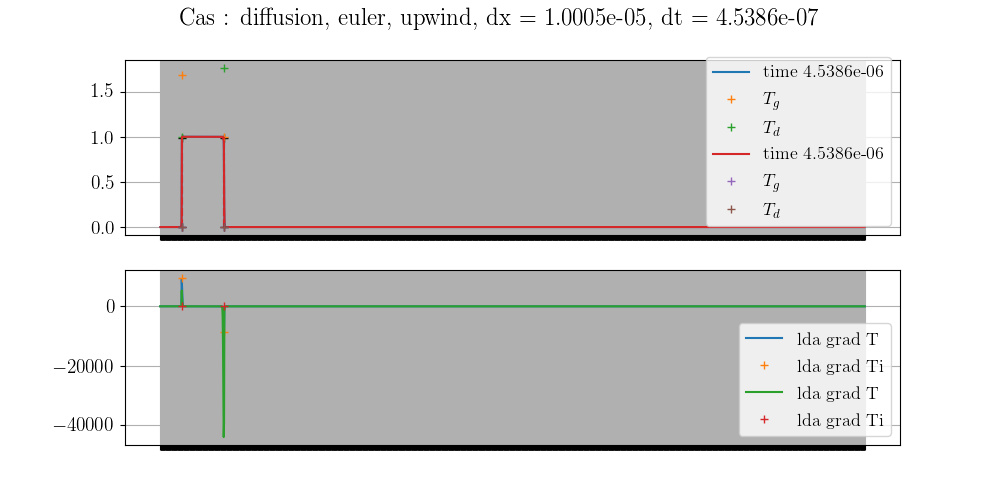

<IPython.core.display.Javascript object>


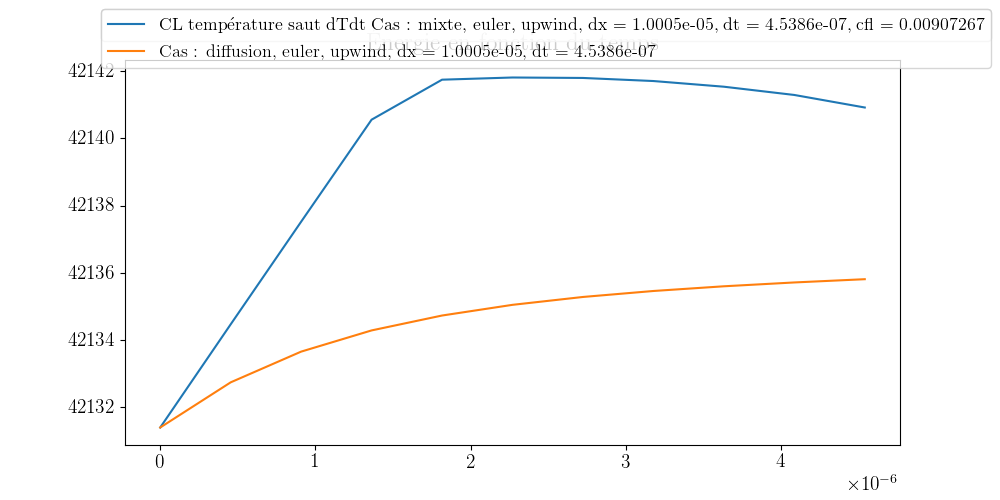

dE*/dt* = 1.0079e-05
dt fourier
4.538601983461999e-07
Cas : diffusion, euler, upwind, dx = 1.0005e-05, dt = 4.5386e-07
plotter mode changed to decale
dE*/dt* ref = 6.39155e-06


In [7]:
t_fin = 0.2
prob = ProblemDiscontinuSautdTdt(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti",
)
E0 = prob.energy
print(prob.name)
print("==========================")
plot = Plotter("decale")
t, e = prob.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

n = len(e)
i0 = int(n / 5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* = %g" % dedt_adim)

prob_ref = Problem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop
)
E1 = prob_ref.energy
print(prob_ref.name)
print("==========================")
plot.cas = "decale"
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=plot
)

l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)
le = fig1.legend()

# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.T.flatten(), 'r+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Tg.flatten(), 'g+')
# plot.ax.plot(prob.bulles.markers.flatten(), prob.bulles.Td.flatten(), 'b+')

dedt_adim = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
# par Dt / rho_cp_l T_l V
print("dE*/dt* ref = %g" % dedt_adim)